In [38]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [39]:
!pip install --upgrade google-generativeai

import google.generativeai as genai
from google.colab import userdata

# Configure API key using userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

# Check if the API key is configured correctly.
# Instead of genai.get_config().api_key, access it via genai.api_key
print(f"API Key: {genai.api_key}")

AttributeError: module 'google.generativeai' has no attribute 'api_key'

In [40]:
import random
import google.generativeai as genai

# Get the latest Gemini model that supports tuning
models = [m for m in genai.list_models() if 'createTunedModel' in m.supported_generation_methods and m.name.startswith('models/')]
if models:
    base_model = models[0].name  # Use the first available model
else:
    raise ValueError("No suitable base model found for tuning.")

name = f'generate-num-{random.randint(0, 10000)}'
# operation = genai.create_tuned_model(
#     source_model=base_model,  # Pass the full model name
#     training_data=[
#         {'text_input': '1', 'output': '2'},
#         {'text_input': '3', 'output': '4'},
#         {'text_input': '-3', 'output': '-2'},
#         {'text_input': 'twenty two', 'output': 'twenty three'},
#         {'text_input': 'two hundred', 'output': 'two hundred one'},
#         {'text_input': 'ninety nine', 'output': 'one hundred'},
#         {'text_input': '8', 'output': '9'},
#         {'text_input': '-98', 'output': '-97'},
#         {'text_input': '1,000', 'output': '1,001'},
#         {'text_input': '10,100,000', 'output': '10,100,001'},
#         {'text_input': 'thirteen', 'output': 'fourteen'},
#         {'text_input': 'eighty', 'output': 'eighty one'},
#         {'text_input': 'one', 'output': 'two'},
#         {'text_input': 'three', 'output': 'four'},
#         {'text_input': 'seven', 'output': 'eight'},
#     ],
#     id=name,
#     epoch_count=100,
#     batch_size=4,
#     learning_rate=0.001,
# )

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [115]:
import os
import pandas as pd

# === Thiết lập đường dẫn gốc ===
root_dir = "/content/drive/MyDrive/VNHSGE-V/JSONformat"

# === Danh sách lưu tất cả DataFrame từ các file JSON ===
all_dataframes = []

# === Duyệt qua toàn bộ thư mục và thư mục con ===
for subdir, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(subdir, file)
            try:
                df = pd.read_json(file_path)
                # Kiểm tra dữ liệu hợp lệ
                if not df.empty and {'Question', 'Choice'}.issubset(df.columns):
                    all_dataframes.append(df)
                else:
                    print(f"[⚠️] Bỏ qua file không hợp lệ: {file_path}")

            except Exception as e:
                print(f"[❌] Lỗi khi đọc {file_path}: {e}")

# === Gộp tất cả các DataFrame thành một ===
if all_dataframes:
    full_dataset = pd.concat(all_dataframes, ignore_index=True)
    df_100 = full_dataset.head(100)
    # Hiển thị vài dòng đầu để kiểm tra
    print("✅ Tổng số mẫu:", len(full_dataset))
    print("🔍 Một vài dòng mẫu:")
    print(full_dataset.sample(5))
    print(df_100.sample(5))
else:
    print("❌ Không tìm thấy dữ liệu hợp lệ nào!")



[⚠️] Bỏ qua file không hợp lệ: /content/drive/MyDrive/VNHSGE-V/JSONformat/eval/Literature/MET_Lit_OE_2020.json
[⚠️] Bỏ qua file không hợp lệ: /content/drive/MyDrive/VNHSGE-V/JSONformat/eval/Literature/MET_Lit_OE_2019.json
[⚠️] Bỏ qua file không hợp lệ: /content/drive/MyDrive/VNHSGE-V/JSONformat/eval/Literature/MET_Lit_OE_2021.json
[⚠️] Bỏ qua file không hợp lệ: /content/drive/MyDrive/VNHSGE-V/JSONformat/eval/Literature/MET_Lit_IE_2023.json
[⚠️] Bỏ qua file không hợp lệ: /content/drive/MyDrive/VNHSGE-V/JSONformat/eval/Literature/MET_Lit_OE_2022.json
✅ Tổng số mẫu: 7097
🔍 Một vài dòng mẫu:
                      ID Image_Question  \
6723           His_40_27                  
3000           Geo_26_24                  
1132   MET_Bio_IE_2020_6                  
451            Civ_40_13                  
1562  MET_Phy_IE_2020_36                  

                                               Question Choice Image_Answer  \
6723  Câu 27:\nYếu tố nào sau đây quyết định sự bùng...      B     

In [116]:
# Áp dụng format cho 100 dòng
formatted_data = [format_example(row) for _, row in df_100.iterrows() if format_example(row) is not None]
# Hiển thị 3 dòng kết quả mẫu
formatted_data[:3]

[{'text_input': 'Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn Địa lý. Đáp án đúng là: B. Trả về đúng định dạng:\nCâu hỏi: ...?\nA. ...\nB. ...\nC. ...\nD. ...\nĐáp án đúng: ...',
  'output': 'Câu hỏi: CÂU 1:Vai trò của rừng đối với môi trường là\nA.cung cấp gỗ và củi.\nB.cân bằng sinh thái.\nC.cung cấp dược liệu.\nD.tài nguyên du lịch.\nA. (phương án 1)\nB. (phương án 2)\nC. (phương án 3)\nD. (phương án 4)\nĐáp án đúng: B'},
 {'text_input': 'Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn Địa lý. Đáp án đúng là: A. Trả về đúng định dạng:\nCâu hỏi: ...?\nA. ...\nB. ...\nC. ...\nD. ...\nĐáp án đúng: ...',
  'output': 'Câu hỏi: CÂU 2:Mùa bão nước ta có đặc điểm\nA.chậm dần từ Bắc vào Nam.\nB.ở miền Trung sớm nhất.\nC.Nam Bộ có bão mạnh nhất.\nD.\xa0Bắc Bộ có bão mạnh muộn.\nA. (phương án 1)\nB. (phương án 2)\nC. (phương án 3)\nD. (phương án 4)\nĐáp án đúng: A'},
 {'text_input': 'Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn Địa lý. Đáp án đúng là: A. Trả về đúng định dạng:\nCâu hỏi: ...?\nA. ...\nB

In [90]:
def extract_subject(id_str):
    code = id_str.split('_')[0]
    mapping = {
        'Math': 'Toán',
        'Phys': 'Vật lý',
        'Chem': 'Hóa học',
        'Bio': 'Sinh học',
        'His': 'Lịch sử',
        'Geo': 'Địa lý',
        'Civ': 'Giáo dục công dân',
        'Lit': 'Ngữ văn',
        'Eng': 'Tiếng Anh'
    }
    return mapping.get(code, 'Không xác định')


In [123]:
def format_example(row):
    if pd.notna(row['Choice']) and pd.notna(row['ID']) and pd.notna(row['Question']):
        subject = extract_subject(row['ID'])
        return {
            "text_input": (
                f"Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn {subject}. "
                f"Đáp án đúng là: {row['Choice']}. "
                "Trả về đúng định dạng:\n"
                "Câu hỏi: ...?\n"
                "A. ...\nB. ...\nC. ...\nD. ...\n"
                "Đáp án đúng: ..."
            ),
            "output": (
                f"Câu hỏi: {row['Question']}\n"
                "A. (phương án 1)\n"
                "B. (phương án 2)\n"
                "C. (phương án 3)\n"
                "D. (phương án 4)\n"
                f"Đáp án đúng: {row['Choice']}"
            )
        }
    else:
        print(f"Bỏ qua vì thiếu dữ liệu: {row.get('Question')}")
        return None

# Convert the Pandas Series to a list of dictionaries, filtering out None values
training_data_list = full_dataset.apply(format_example, axis=1).dropna().tolist()
name = f'generate-exam-{random.randint(0, 10000)}'
operation = genai.create_tuned_model(
    source_model=base_model,  # Pass the full model name
    training_data=formatted_data,  # Pass the list of dictionaries
    id=name,
    epoch_count=3,
    batch_size=64,
    learning_rate=1,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [119]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-exam-9485',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 4, 9, 21, 13, 43, 411351, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 4, 9, 21, 13, 43, 411351, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=None,
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=5,
                                                                  batch_size=64,
                                                                  learning_rate=1.0)),
           reader_project_numbers=None)

In [120]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [121]:
operation.metadata

total_steps: 8
tuned_model: "tunedModels/generate-exam-9485"

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [125]:
import json
for i, ex in enumerate(formatted_data[:5]):
    print(f"--- Example {i+1} ---")
    print(json.dumps(ex, indent=2, ensure_ascii=False))


--- Example 1 ---
{
  "text_input": "Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn Địa lý. Đáp án đúng là: B. Trả về đúng định dạng:\nCâu hỏi: ...?\nA. ...\nB. ...\nC. ...\nD. ...\nĐáp án đúng: ...",
  "output": "Câu hỏi: CÂU 1:Vai trò của rừng đối với môi trường là\nA.cung cấp gỗ và củi.\nB.cân bằng sinh thái.\nC.cung cấp dược liệu.\nD.tài nguyên du lịch.\nA. (phương án 1)\nB. (phương án 2)\nC. (phương án 3)\nD. (phương án 4)\nĐáp án đúng: B"
}
--- Example 2 ---
{
  "text_input": "Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn Địa lý. Đáp án đúng là: A. Trả về đúng định dạng:\nCâu hỏi: ...?\nA. ...\nB. ...\nC. ...\nD. ...\nĐáp án đúng: ...",
  "output": "Câu hỏi: CÂU 2:Mùa bão nước ta có đặc điểm\nA.chậm dần từ Bắc vào Nam.\nB.ở miền Trung sớm nhất.\nC.Nam Bộ có bão mạnh nhất.\nD. Bắc Bộ có bão mạnh muộn.\nA. (phương án 1)\nB. (phương án 2)\nC. (phương án 3)\nD. (phương án 4)\nĐáp án đúng: A"
}
--- Example 3 ---
{
  "text_input": "Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn Địa lý. Đáp án đún

In [126]:
print(df_100.columns)  # hoặc df.columns nếu là toàn bộ


Index(['ID', 'Image_Question', 'Question', 'Choice', 'Image_Answer',
       'Explanation'],
      dtype='object')


In [132]:
def extract_subject(id_str):
    code = id_str.split('_')[0]
    mapping = {
        'Math': 'Toán',
        'Phys': 'Vật lý',
        'Chem': 'Hóa học',
        'Bio': 'Sinh học',
        'His': 'Lịch sử',
        'Geo': 'Địa lý',
        'Civ': 'Giáo dục công dân',
        'Eng': 'Tiếng Anh',
        'Lit': 'Ngữ văn'
    }
    return mapping.get(code, 'Không xác định')

def format_example_final(row):
    if pd.notna(row['Choice']) and pd.notna(row['ID']) and pd.notna(row['Question']):
        subject = extract_subject(row['ID'])
        return {
            "text_input": (
                f"Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn {subject}. "
                f"Đáp án đúng là: {row['Choice']}. "
                "Trả về định dạng đầy đủ gồm: Câu hỏi, 4 phương án A-D, và đáp án đúng."
            ),
            "output": (
                f"{row['Question']}\n"
                f"Đáp án đúng: {row['Choice']}"
            )
        }
    return None


# Áp dụng lại
formatted_data_clean = [format_example_final(row) for _, row in df_100.iterrows() if format_example_final(row) is not None]


In [136]:
# Convert the Pandas Series to a list of dictionaries, filtering out None values
training_data_list = full_dataset.apply(format_example, axis=1).dropna().tolist()
name = f'generate-exam-{random.randint(0, 10000)}'
operation = genai.create_tuned_model(
    source_model=base_model,  # Pass the full model name
    training_data=formatted_data_clean,  # Pass the list of dictionaries
    id=name,
    epoch_count=10,
    batch_size=64,
    learning_rate=1,
)

In [134]:
import re

def check_format_issues(data):
    for i, sample in enumerate(data):
        if not isinstance(sample, dict):
            print(f"❌ Mẫu {i} không phải dictionary")
            continue
        for field in ['text_input', 'output']:
            if field not in sample:
                print(f"❌ Mẫu {i} thiếu trường '{field}'")
                continue
            value = sample[field]
            if not isinstance(value, str):
                print(f"❌ Mẫu {i} trường {field} không phải string")
            if len(value.strip()) < 20:
                print(f"⚠️ Mẫu {i} trường {field} quá ngắn: {repr(value)}")
            if "..." in value:
                print(f"⚠️ Mẫu {i} chứa '...': {repr(value[:50])}")
            if re.search(r'[^\x00-\x7F]', value):
                print(f"✅ Mẫu {i} có ký tự Unicode (Tiếng Việt là OK)")
    print("✅ Kiểm tra xong!")
check_format_issues(formatted_data_clean)


✅ Mẫu 0 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 0 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 1 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 1 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 2 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 2 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 3 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 3 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 4 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 4 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 5 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 5 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 6 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 6 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 7 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 7 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 8 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 8 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 9 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 9 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 10 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 10 có ký tự Unicode (Tiếng Việt là OK)
✅ Mẫu 11 có ký tự Unicode (Tiế

In [ ]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
operation.cancel()

📊 Các cột trong snapshot: Index(['step', 'mean_loss', 'compute_time', 'epoch'], dtype='object')
🔍 Dữ liệu mẫu:
   step   mean_loss                     compute_time  epoch
0     1   205.89761 2025-04-09 15:02:23.529817+00:00    NaN
1     2  1962.59640 2025-04-09 15:02:40.362033+00:00    NaN
2     3  3092.90720 2025-04-09 15:02:58.288374+00:00    NaN
3     4  1750.41520 2025-04-09 15:03:16.203262+00:00    NaN
4     5  1209.90480 2025-04-09 15:03:35.515945+00:00    NaN


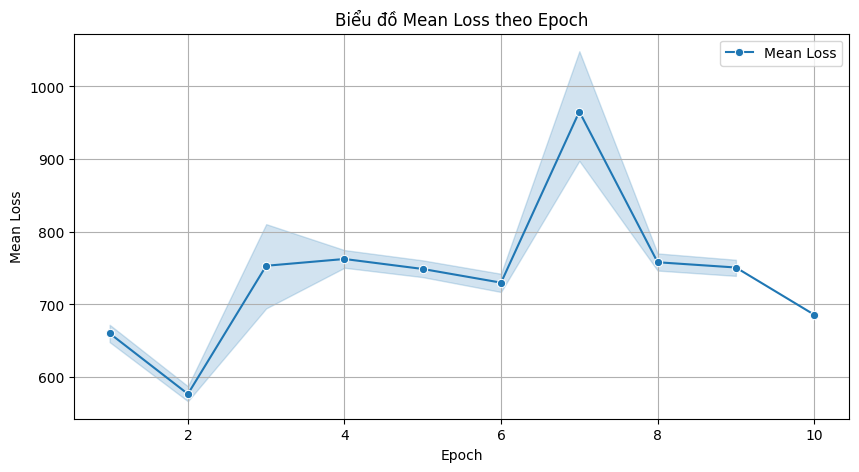

ValueError: Could not interpret value `min_loss` for `y`. An entry with this name does not appear in `data`.

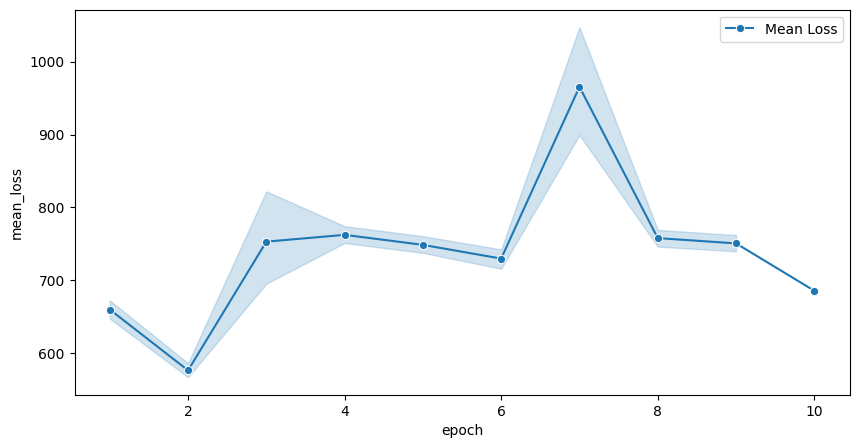

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy mô hình đã huấn luyện hoàn tất
model = operation.result()

# Truy xuất thông tin huấn luyện (snapshot theo epoch)
snapshots = pd.DataFrame(model.tuning_task.snapshots)

# Hiển thị thông tin cơ bản
print("📊 Các cột trong snapshot:", snapshots.columns)
print("🔍 Dữ liệu mẫu:")
print(snapshots.head())

# ------------------------------------------
# 🔵 BIỂU ĐỒ 1: Biểu diễn Mean Loss theo Epoch
# ------------------------------------------
plt.figure(figsize=(10, 5))
sns.lineplot(data=snapshots, x='epoch', y='mean_loss', label='Mean Loss', marker='o')
plt.title('Biểu đồ Mean Loss theo Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.grid(True)
plt.legend()
plt.show()

"""
📘 Giải thích:
- "Mean Loss" là trung bình sai số của mô hình trên tập huấn luyện tại mỗi epoch.
- Đường biểu diễn càng giảm → mô hình học càng tốt.
- Nếu đường phẳng → mô hình có thể học chậm hoặc đã đạt ngưỡng.
"""

# ------------------------------------------
# 🟠 BIỂU ĐỒ 2: So sánh Min / Max / Mean Loss
# ------------------------------------------
plt.figure(figsize=(10, 5))
sns.lineplot(data=snapshots, x='epoch', y='mean_loss', label='Mean Loss', marker='o')
sns.lineplot(data=snapshots, x='epoch', y='min_loss', label='Min Loss', linestyle='--')
sns.lineplot(data=snapshots, x='epoch', y='max_loss', label='Max Loss', linestyle='--')
plt.title('So sánh Min / Mean / Max Loss theo Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

"""
📘 Giải thích:
- Min/Max Loss thể hiện khoảng dao động của loss trên các batch trong 1 epoch.
- Nếu Min và Max cách nhau quá xa → batch huấn luyện không ổn định.
- Đường Mean Loss nằm gần Min → tốt; nếu gần Max → có thể đang overfit.
"""

# ------------------------------------------
# 🟢 THỐNG KÊ MỨC GIẢM LOSS TOÀN BỘ
# ------------------------------------------
start_loss = snapshots['mean_loss'].iloc[0]
end_loss = snapshots['mean_loss'].iloc[-1]
loss_reduction = start_loss - end_loss
loss_percent = (loss_reduction / start_loss) * 100

print(f"\n📉 Mean loss giảm từ {start_loss:.4f} xuống {end_loss:.4f} ({loss_percent:.2f}%)")

"""
📘 Giải thích:
- Đây là thống kê mức độ cải thiện của mô hình trong suốt quá trình huấn luyện.
- Nếu giảm > 50%: mô hình học khá tốt.
- Nếu giảm ít hoặc tăng → cần điều chỉnh lại learning rate, batch size, hoặc chất lượng dữ liệu.
"""

# ------------------------------------------
# 🔻 BIỂU ĐỒ 3: Tốc độ thay đổi loss qua từng Epoch
# ------------------------------------------
snapshots['loss_change'] = snapshots['mean_loss'].diff()

plt.figure(figsize=(10, 5))
sns.barplot(data=snapshots[1:], x='epoch', y='loss_change', palette='coolwarm')  # bỏ epoch 0 (NaN diff)
plt.title('Tốc độ thay đổi Mean Loss giữa các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Δ Mean Loss')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.show()

"""
📘 Giải thích:
- Cột dương → Loss giảm → mô hình học hiệu quả ở epoch đó.
- Cột âm → Loss tăng → mô hình bị sai lệch hoặc dữ liệu nhiễu.
- Nếu biểu đồ giảm dần đều → rất tốt.
- Nếu có nhiều dao động lên xuống → cần xem lại dữ liệu đầu vào.
"""


In [106]:
from google.generativeai import GenerativeModel

model_name = "tunedModels/generate-num-3563"  # thay bằng tên model của bạn
model = genai.GenerativeModel(model_name)

start = time()
response = model.generate_content("Tạo một câu hỏi trắc nghiệm lớp 11 môn Toán lớp 11")
end = time()

print("✅ Câu hỏi sinh ra:", response.text)
print("🕒 Thời gian sinh câu hỏi:", round(end - start, 2), "giây")


✅ Câu hỏi sinh ra:  ... có.


..DA  của B đúng,.  đúngD.4. đúngC
.D.1 án.
.5D
DDC
DCAD A::, ... làA.A
D. 19..áp nào1 đúng..
.CCâu
A1 ...Câu của,:


 C
 BĐ.
🕒 Thời gian sinh câu hỏi: 4.58 giây


In [110]:
# prompt = (
#     "Hãy tạo một câu hỏi trắc nghiệm lớp 11 môn Toán theo định dạng sau:\n\n"
#     "Câu hỏi: ...?\n"
#     "A. ...\nB. ...\nC. ...\nD. ...\n"
#     "Đáp án đúng: ..."
# )



# response = model.generate_content(prompt)
# print(response.text)
prompt = (
    "Ví dụ:\n"
    "Câu hỏi: Hàm số y = x^2 có đạo hàm là?\n"
    "A. 2x\nB. x\nC. x^2\nD. 1\n"
    "Đáp án đúng: A\n\n"
    "Câu hỏi tiếp theo môn Toán lớp 11 là:"
)

response = genai.GenerativeModel("gemini-1.5-pro").generate_content(prompt)
print(response.text)


Cho cấp số cộng (u_n) có u_1 = 3 và công sai d = 2. Số hạng thứ 5 của cấp số cộng này là?

A. 11
B. 13
C. 15
D. 17



In [103]:
print(snapshots.columns)


Index(['step', 'mean_loss', 'compute_time', 'epoch'], dtype='object')


## Evaluate model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

## Update the description


In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

## Delete the model


In [93]:
genai.delete_tuned_model(f'tunedModels/{name}')

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")